# Label-Propagation by K-Means:

In [19]:
import matplotlib.pyplot as plt
import random
import keras
import copy

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [70]:
X_train_full.shape

(60000, 28, 28)

### Splitting the train_set into validation & train set again as well as setting up:

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
X_valid.shape, X_train.shape, y_valid.shape, y_train.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,))

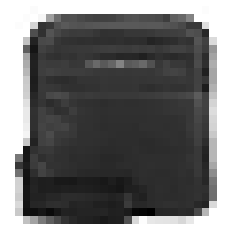

In [6]:
plt.imshow(X_train[random.randint(0,5000)], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
x_bag = X_valid[y_valid==8]              #bag samples
x_Dress = X_valid[y_valid==3]            #Dress Samples

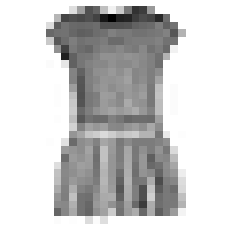

In [16]:
import numpy as np
plt.imshow(x_Dress[np.random.randint(0,50)], cmap="binary")
plt.axis('off')
plt.show()

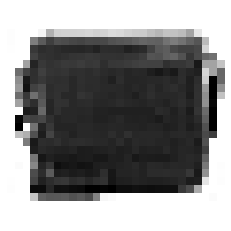

In [18]:
import numpy as np
plt.imshow(x_bag[np.random.randint(0,50)], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
random.randint(0,5000)

284

In [14]:
x_train_2d = X_train.view().reshape(X_train.shape[0],-1)         #Converting 28*28 image arrays to 784-D vectors
x_val_2d = X_valid.view().reshape(X_valid.shape[0],-1)           #Converting 28*28 image arrays to 784-D vectors

In [15]:
x_train_2d.shape, x_val_2d.shape

((55000, 784), (5000, 784))

-----------------
# Performing Clustering

In [20]:
import time

## Checking for wider range of cluster counts only for Inertia

In [79]:
%%time
inertia = []
for k in range(2, 60):
    start = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_train_2d)
    inertia.append(kmeans.inertia_)
    end = time.time()
    print("{}_th cluster converged in {} iterations in {} seconds".format(k, kmeans.n_iter_,end-start))

2_th cluster converged in 33 iterations in 10.706506729125977 seconds
3_th cluster converged in 46 iterations in 18.918827533721924 seconds
4_th cluster converged in 44 iterations in 16.41267704963684 seconds
5_th cluster converged in 31 iterations in 22.869202375411987 seconds
6_th cluster converged in 24 iterations in 21.65074396133423 seconds
7_th cluster converged in 19 iterations in 21.155452489852905 seconds
8_th cluster converged in 32 iterations in 23.605852842330933 seconds
9_th cluster converged in 47 iterations in 24.223313331604004 seconds
10_th cluster converged in 88 iterations in 26.122515439987183 seconds
11_th cluster converged in 48 iterations in 27.472070693969727 seconds
12_th cluster converged in 58 iterations in 28.128441333770752 seconds
13_th cluster converged in 54 iterations in 29.67461085319519 seconds
14_th cluster converged in 39 iterations in 32.77130103111267 seconds
15_th cluster converged in 27 iterations in 38.86772894859314 seconds
16_th cluster conve

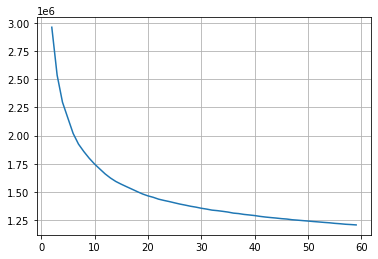

In [80]:
plt.plot(range(2,60), inertia)
plt.grid()

### We can see slight elbows occuring at k = 5, 7, 13, 18
-----------------------------------------
## Clustering and recording Inertia as well as Silhouette Score for a better inference on cluster counts

In [17]:
%%time
inertia = []
silh = []
for k in range(2, 25):
    start = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_train_2d)
    silh.append(silhouette_score(x_train_2d, kmeans.labels_))
    inertia.append(kmeans.inertia_)
    end = time.time()
    print("{}_th cluster converged in {} iterations in {} seconds".format(k, kmeans.n_iter_,end-start))

2_th cluster converged in 33 iterations in 105.72292494773865 seconds
3_th cluster converged in 46 iterations in 105.09710788726807 seconds
4_th cluster converged in 44 iterations in 91.92447805404663 seconds
5_th cluster converged in 31 iterations in 97.00712370872498 seconds
6_th cluster converged in 24 iterations in 82.80404138565063 seconds
7_th cluster converged in 19 iterations in 88.55317091941833 seconds
8_th cluster converged in 32 iterations in 91.49218440055847 seconds
9_th cluster converged in 47 iterations in 91.29729080200195 seconds
10_th cluster converged in 88 iterations in 98.86937165260315 seconds
11_th cluster converged in 48 iterations in 94.83403658866882 seconds
12_th cluster converged in 71 iterations in 94.7277443408966 seconds
13_th cluster converged in 54 iterations in 97.11730289459229 seconds
14_th cluster converged in 39 iterations in 105.91403317451477 seconds
15_th cluster converged in 27 iterations in 105.41293478012085 seconds
16_th cluster converged i

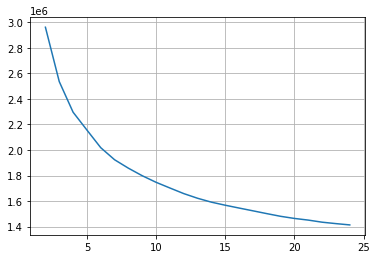

In [18]:
plt.plot(range(2,25), inertia)
plt.grid()

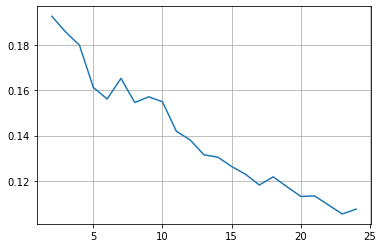

In [19]:
plt.plot(range(2,25), silh)
plt.grid()

## Even though we know that actual number of labels are 10, the inertia and silhouette score plot suggests that the optimum number of clusters are 5 and 7. So, lets see what does these cluster counts gives us:

In [22]:
def clusters_at_k(x_train_2d, x_val_2d, k = 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x_train_2d)
    centres = kmeans.cluster_centers_
    for i in centres:
        im = i.view().reshape(28,-1)
        plt.imshow(im, cmap="binary")
        plt.axis('off')
        plt.show()
    return y_pred, kmeans.predict(x_val_2d)

-----------------
# At cluster count as 5:

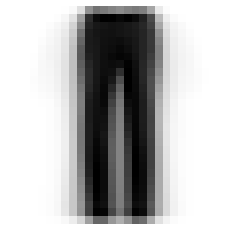

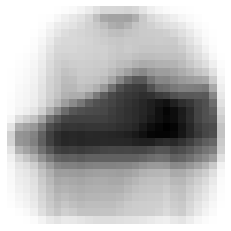

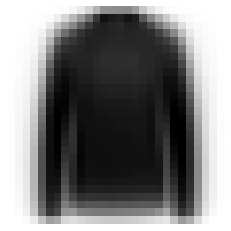

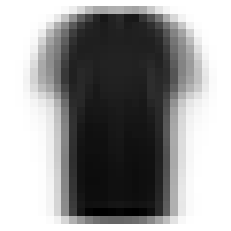

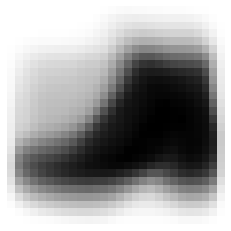

Wall time: 24.2 s


In [25]:
%%time
y_pred_5, x_val_pred_5 = clusters_at_k(x_train_2d, x_val_2d, k=5)

In [26]:
x_val_pred_5.shape

(5000,)

In [31]:
pred_clust = ["Pant", "Shoe-Shirt-Brid", "Jacket", "T-shirt", "Foot-Wear"]

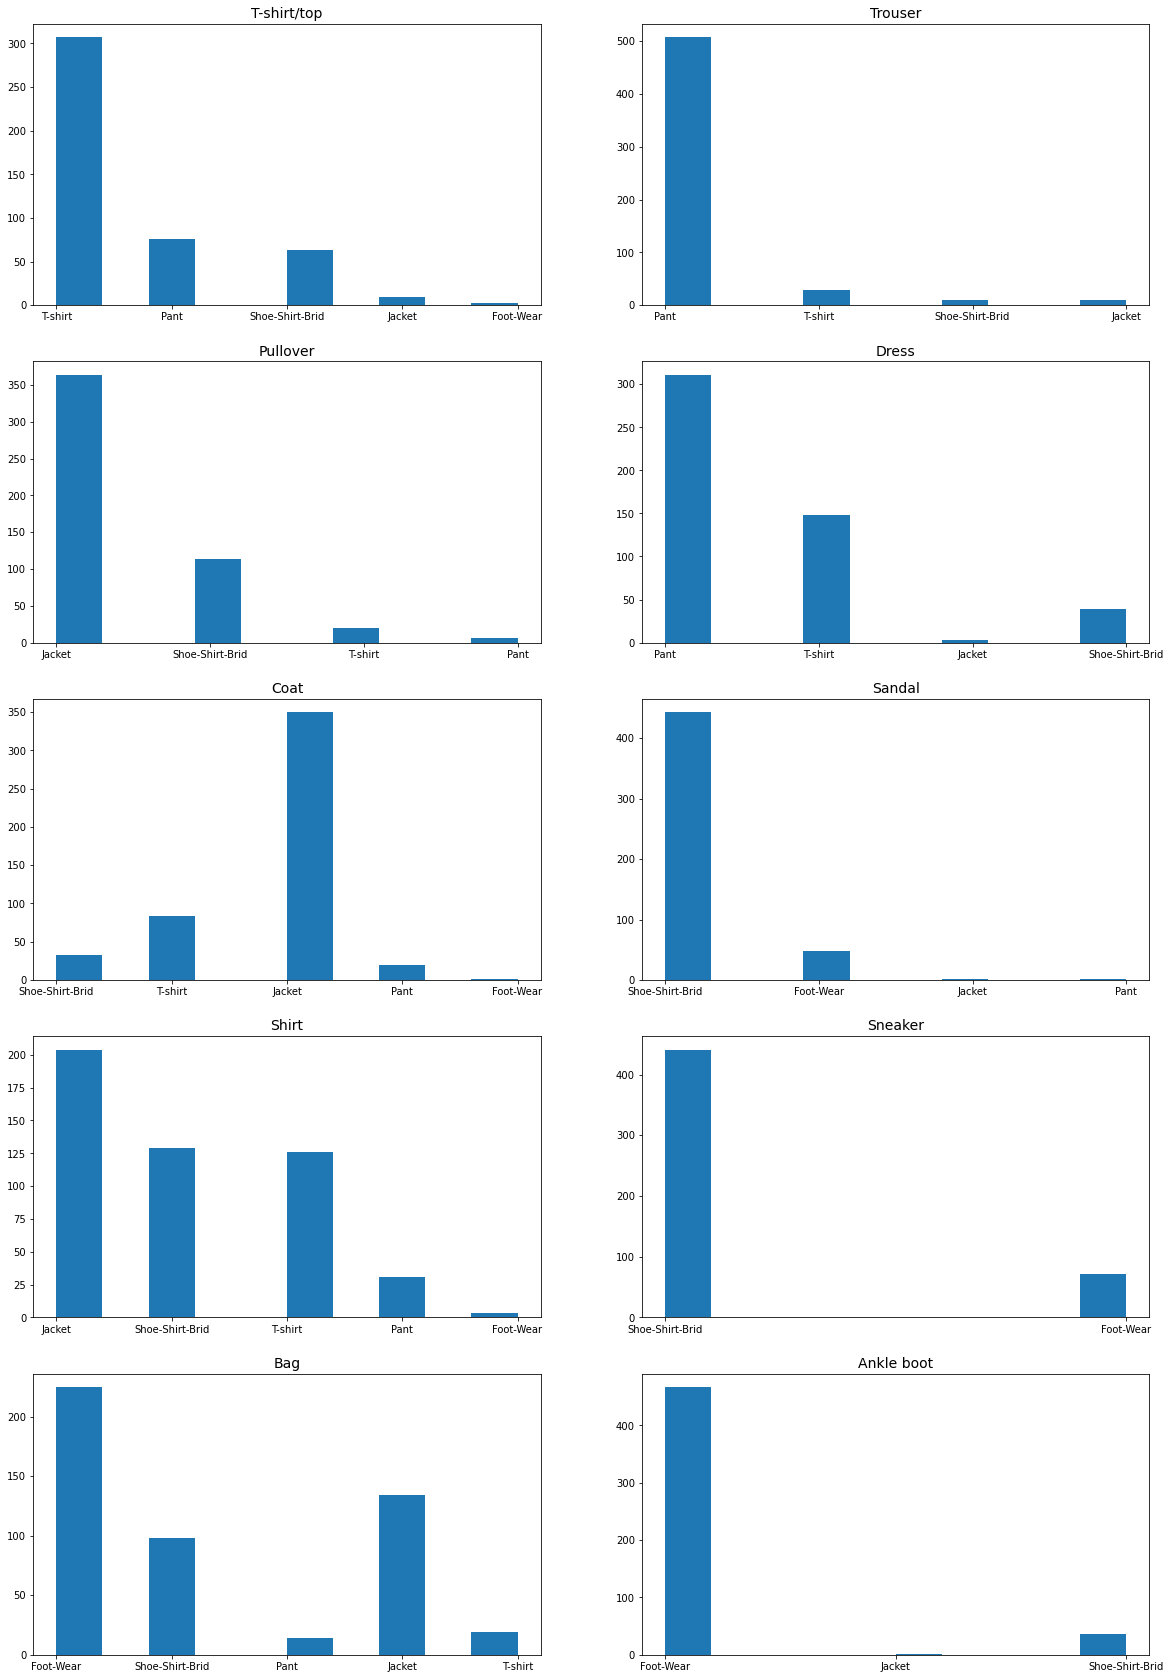

In [33]:
plt.figure(figsize=(20, 30))
for j in range(10):
    clust = []
    for i in x_val_pred_5[y_valid == j]:
        clust.append(pred_clust[i]) 
#     print(j)
    plt.subplot(5, 2, j+1)
    plt.hist(clust)
    plt.title(class_names[j], fontsize=14)

## Here, the plot titles are the true categories and the x-axis labels are the k-means prediction
Here, one of the cluster labels is named as "shoe-shirt-brid" i.e, the cluster centre tends to represent shoes as well as shirts as seen in the 2nd cluster centre viuslisation. The frequency plots also susggests that "shoe-shirt-brid" cluster represents footwears and shirt for a major count. This leads to wrong results in the cluster. Other clusters correctly identifies upper-bodywears and lower body-wears but again the clustering for bag is wrong.

-----------------
## Performing k-means again on the data belonging to "shoe-shirt-brid" and "footwear" clusters individually and try finding if the "shoe-shirt-brid" cluster breaks into shirts and shoes as well as if "footwear" cluster breaks into bag and footwears. 

----------------
### Splitting Shoe-Shirt-Brid (A fancy name for the centre above matching with both footwear and upper-body wear)

In [50]:
x_train_2d_ssb = x_train_2d[y_pred_5==1]
x_val_2d_ssb = x_val_2d[x_val_pred_5==1]
x_train_2d_ssb.shape, x_val_2d_ssb.shape

((16110, 784), (1407, 784))

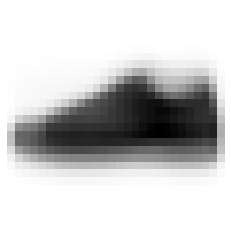

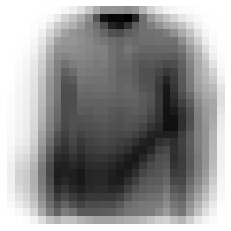

In [51]:
x_pred_ssb, x_val_pred_ssb = clusters_at_k(x_train_2d_ssb,x_val_2d_ssb,k=2)

In [52]:
x_val_pred_ssb

array([0, 1, 1, ..., 0, 1, 0])

### As expected, Shoe-Shirt-Brid cluster separates successfully into shoe and shirt clusters
-----------------
### Splitting Footwear cluster

In [53]:
x_train_2d_fw = x_train_2d[y_pred_5==4]
x_val_2d_fw = x_val_2d[x_val_pred_5==4]

In [54]:
x_train_2d_fw.shape,x_val_2d_fw.shape

((8713, 784), (817, 784))

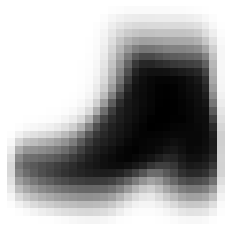

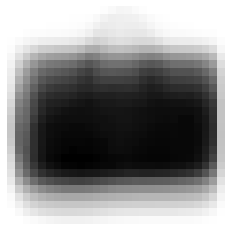

In [55]:
x_pred_fw, x_val_pred_fw=clusters_at_k(x_train_2d_fw,x_val_2d_fw,k=2)

#### As expected, Footwear cluster separates successfully into boot and bag clusters. (Expected because while clustering at k=5, the shoes and bags were majorly represented by Footwear cluster.

------------------------------
# At cluster count as 7:

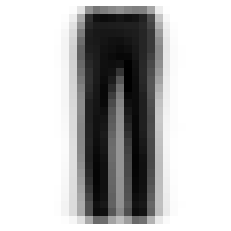

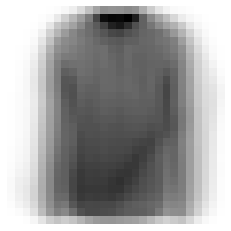

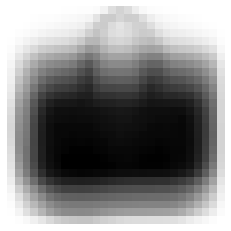

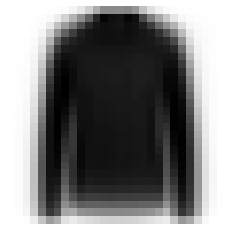

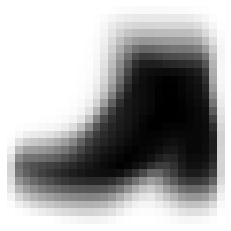

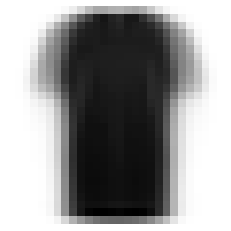

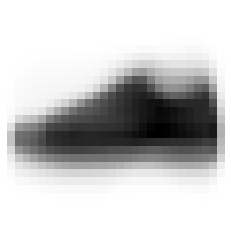

In [71]:
x_pred_7, x_val_pred_7 = clusters_at_k(x_train_2d, x_val_2d, k=7)

In [72]:
pred_clust = ["Pant", "Pullover", "Bag", "Jacket", "Boot", "Shirt", "Footwear"]

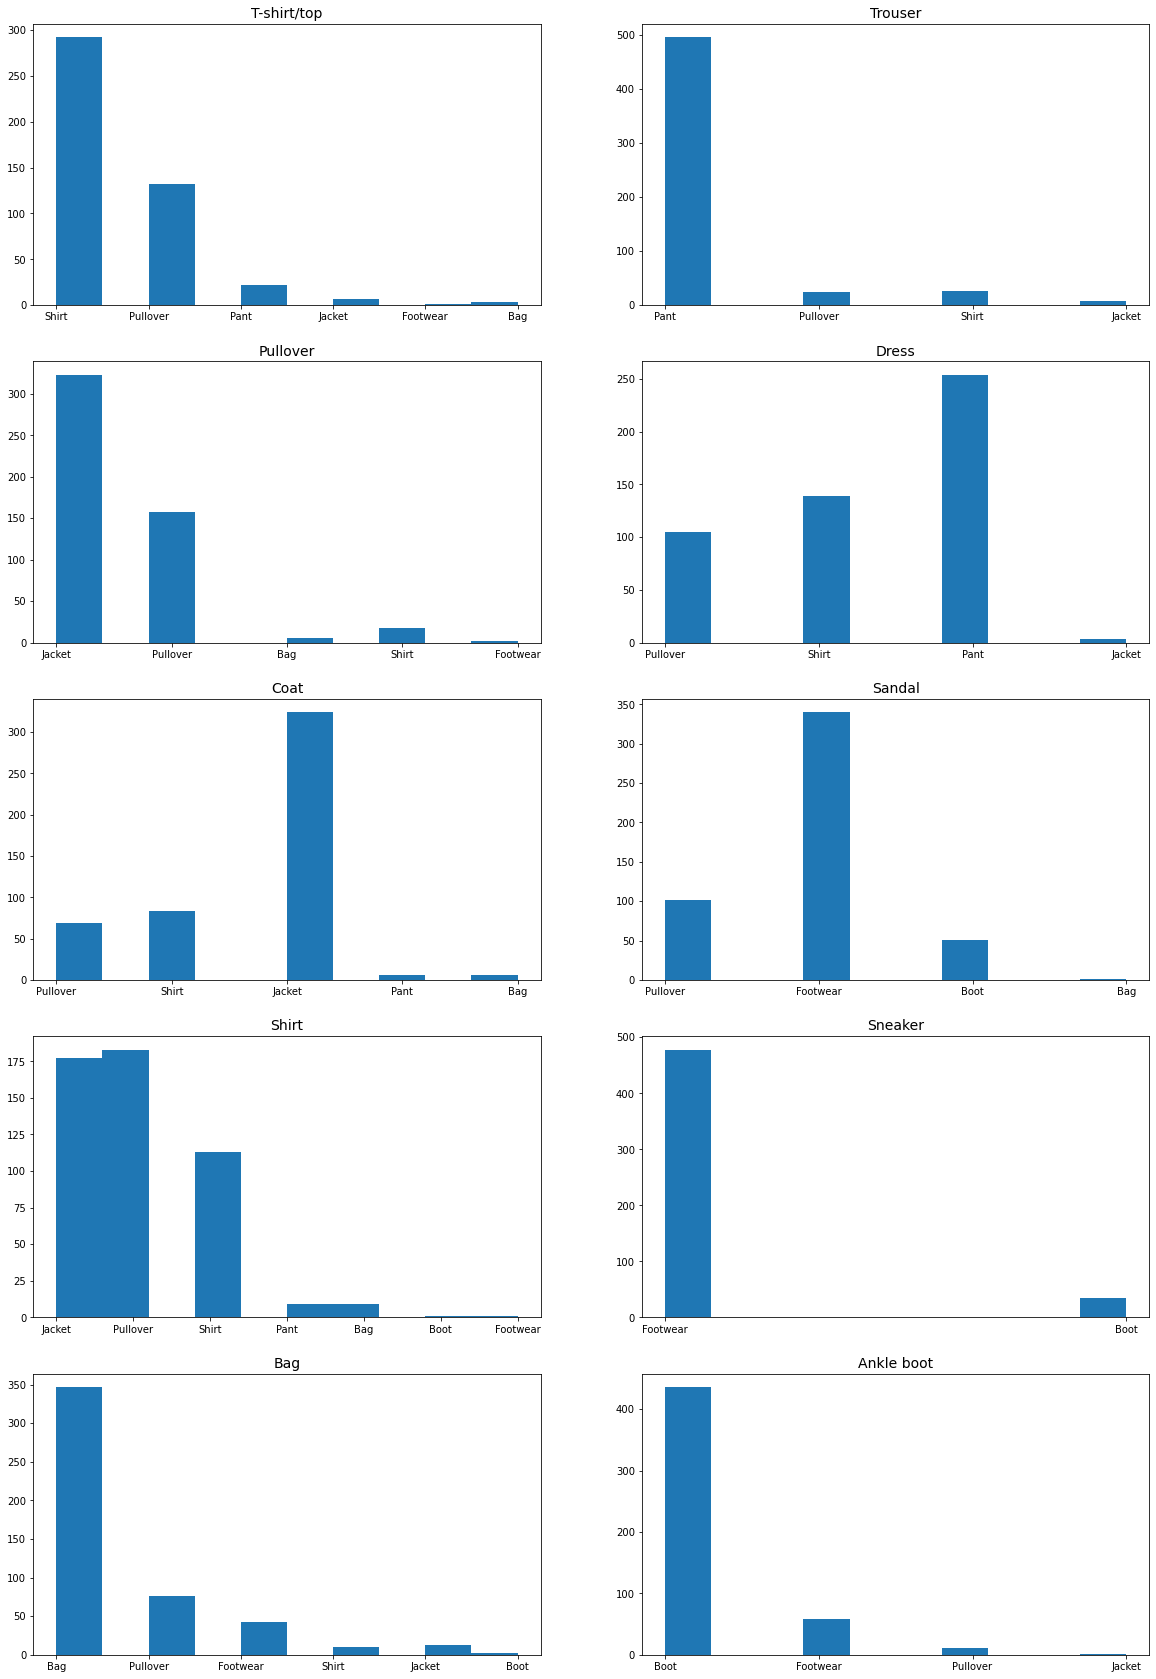

In [73]:
plt.figure(figsize=(20, 30))
for j in range(10):
    clust = []
    for i in x_val_pred_7[y_valid == j]:
        clust.append(pred_clust[i]) 
#     print(j)
    plt.subplot(5, 2, j+1)
    plt.hist(clust)
    plt.title(class_names[j], fontsize=14)

## Here, the plot titles are the true categories and the x-axis labels are the k-means prediction
* The Plots suggests that "T-shirt/top", "Pullover", "Dress", "Coat", "Shirt" fall under the upper body clothings like Shirt, Pullover, Jacket and "Sneaker", "Sandals", "Ankle boot" are alsmost correctly classified as Foot-wears and Boots as well as "Trousers" are almost correcctly classified as lower body wears i.e, pants. 
* Same is the case for bags.
* However, dress is wrongly classified as pant, shirt and pullovers.
---------------------------

# Cluster count at 10 (as the labels are known)

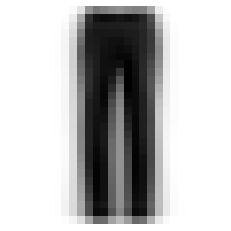

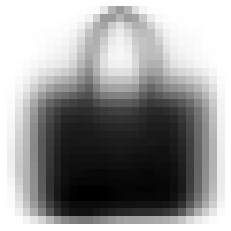

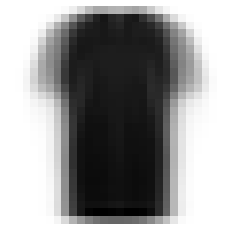

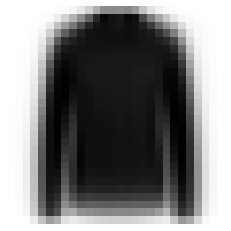

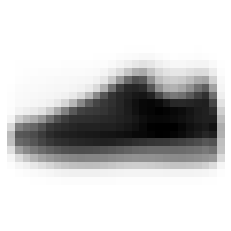

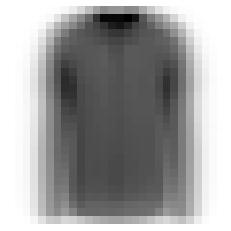

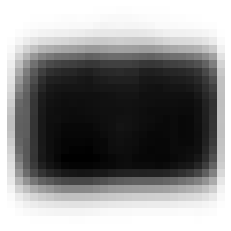

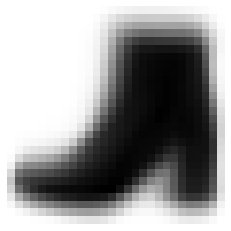

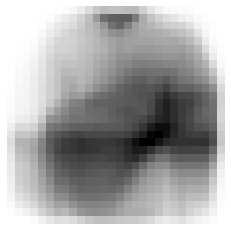

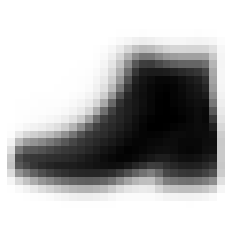

In [74]:
x_pred_10, x_val_pred_10 = clusters_at_k(x_train_2d, x_val_2d, k=10)

In [81]:
pred_clust = ["Pant", "Bag", "Shirt",  "Jacket", "Shoe", "Pullover","Bag-1", "Boot", "Footwear-Jacket", "Footwear"]

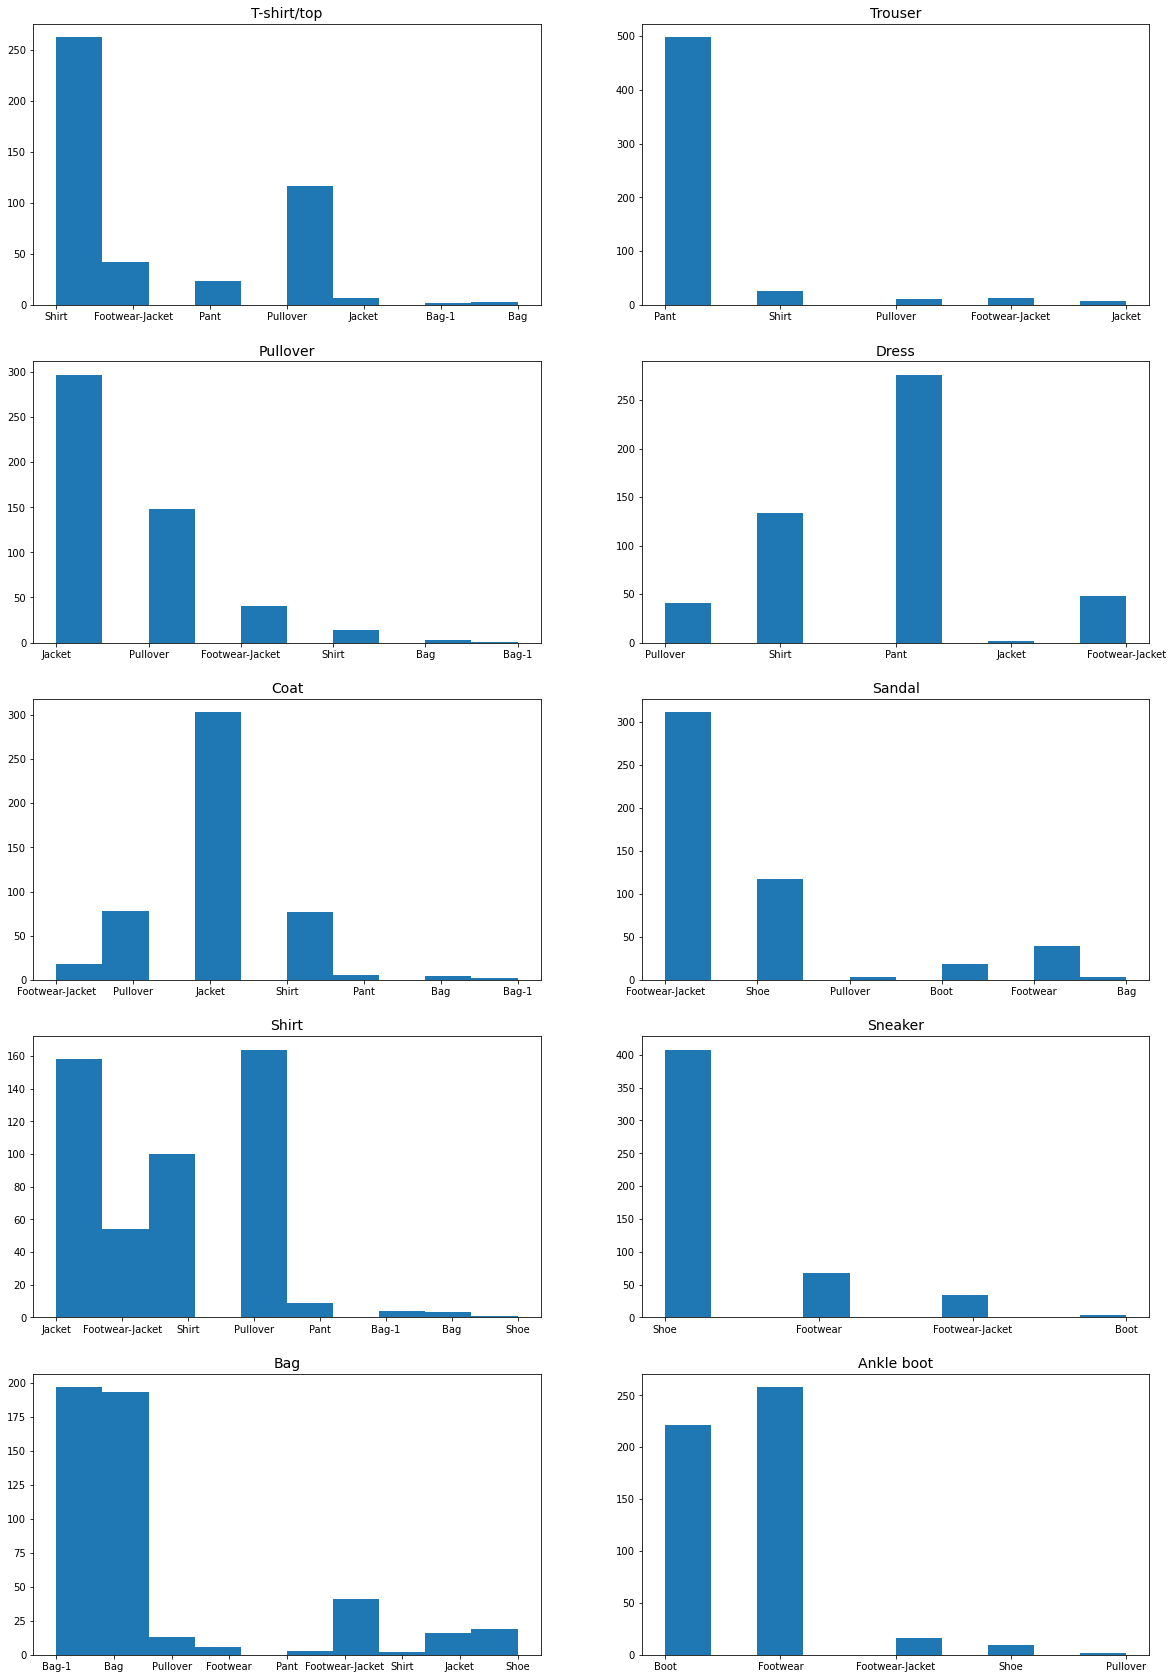

In [82]:
plt.figure(figsize=(20, 30))
for j in range(10):
    clust = []
    for i in x_val_pred_10[y_valid == j]:
        clust.append(pred_clust[i]) 
#     print(j)
    plt.subplot(5, 2, j+1)
    plt.hist(clust)
    plt.title(class_names[j], fontsize=14)

### Here, even though we know there are 10 categories, the 9th cluster again is a hybrid of Jacket and Boot. This also suggests that Silhoutte scores and Inertia curve suggestion of k=7 is an acceptable choice.
-------------------------
## Time Complexity of K-Means: O(n)/iteration where n is the number of training data points.

---------------------------------------------------------------------------------
# Presenting a use case of Unsupervised Learning:

Here, we perform classification by using a neural network with 3 layers with 300 neurons (ReLu), 100 neurons (ReLu), 10 neurons (Softmax->output layer).

Using that we demonstrate the use of training with meaningful representatives and as well as the advantaage of labelling data after clustering.

In [34]:
X_valid.shape, X_train.shape, y_valid.shape, y_train.shape, x_train_2d.shape, x_val_2d.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,), (55000, 784), (5000, 784))

In [35]:
type(x_train_2d), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [37]:
np.random.randint(5)

4

In [39]:
np.random.choice(range(50), size=5, replace=False, p=None)

array([11, 48, 38,  3, 20])

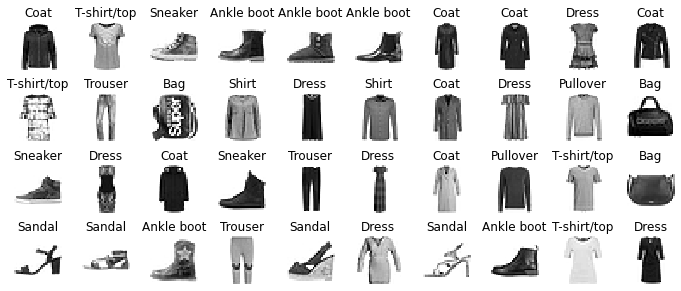

In [41]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [75]:
def random_data(x, y, n=100):
    rand_d = np.random.choice(range(x.shape[0]), size=n, replace=False, p=None)
    x_ret = []
    y_ret = []
    for d in rand_d:
        x_ret.append(x[d])
        y_ret.append(y[d])
    x_ret = np.asarray(x_ret)
    y_ret = np.asarray(y_ret)
    print("Sampled data shapes (x and y) are: ", x_ret.shape, y_ret.shape)
    return x_ret, y_ret
        

In [133]:
x_rand, y_rand = random_data(x_train_2d, y_train, 100)

Sampled data shapes (x and y) are:  (100, 784) (100,)


In [82]:
keras.backend.clear_session()

In [83]:
model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [84]:
model.layers

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Training the model on the entire training set

In [86]:
history = model.fit(x_train_2d, y_train, epochs=30,
                    validation_data=(x_val_2d, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.9977 - accuracy: 0.6754 - val_loss: 0.5024 - val_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5014 - accuracy: 0.8249 - val_loss: 0.4442 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4447 - accuracy: 0.8454 - val_loss: 0.4179 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4103 - accuracy: 0.8571 - val_loss: 0.4022 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3958 - accuracy: 0.8620 - val_loss: 0.3870 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3770 - accuracy: 0.8677 - val_loss: 0.3679 - val_accuracy: 0.8762
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8699 - val_loss: 0.3635 - val_accuracy:

#### Here, the validation set accuracy is 89.6 % after 30 epochs

In [89]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

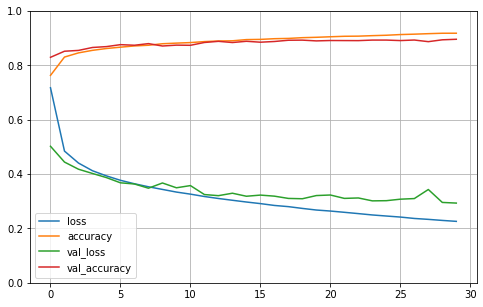

In [90]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Training the model on the 100 randomly picked images from the train set

In [134]:
keras.backend.clear_session()
model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [135]:
history = model.fit(x_rand, y_rand, epochs=30,
                    validation_data=(x_val_2d, y_valid))

Epoch 1/30
4/4 [==============================] - 1s 167ms/step - loss: 2.3794 - accuracy: 0.1046 - val_loss: 2.2684 - val_accuracy: 0.1556
Epoch 2/30
4/4 [==============================] - 0s 76ms/step - loss: 2.2572 - accuracy: 0.1380 - val_loss: 2.1955 - val_accuracy: 0.2050
Epoch 3/30
4/4 [==============================] - 0s 73ms/step - loss: 2.1326 - accuracy: 0.3049 - val_loss: 2.1251 - val_accuracy: 0.3106
Epoch 4/30
4/4 [==============================] - 0s 76ms/step - loss: 2.0148 - accuracy: 0.4503 - val_loss: 2.0848 - val_accuracy: 0.3098
Epoch 5/30
4/4 [==============================] - 0s 75ms/step - loss: 1.9448 - accuracy: 0.4639 - val_loss: 2.0235 - val_accuracy: 0.3632
Epoch 6/30
4/4 [==============================] - 0s 70ms/step - loss: 1.8696 - accuracy: 0.5348 - val_loss: 1.9794 - val_accuracy: 0.3716
Epoch 7/30
4/4 [==============================] - 0s 93ms/step - loss: 1.8079 - accuracy: 0.5573 - val_loss: 1.9215 - val_accuracy: 0.3958
Epoch 8/30
4/4 [==========

#### Here, the validation set accuracy falls to 61.3 % after 30 epochs

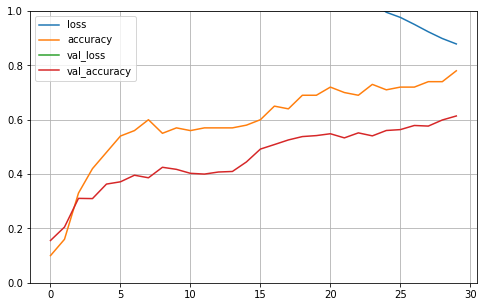

In [136]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

--------------------------
## Training the model on 100 representative images from the training set after performing clustering:

In [138]:
%%time
kmeans = KMeans(n_clusters=100, random_state=42)
y_pred = kmeans.fit_transform(x_train_2d)


Wall time: 3min 57s


In [182]:
centres = kmeans.cluster_centers_
rep_indexes = np.argmin(y_pred, axis=0)
X_rep = x_train_2d[rep_indexes]

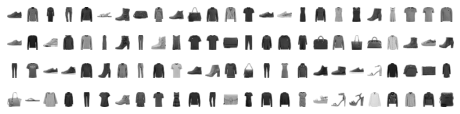

In [183]:
plt.figure(figsize=(8, 2))
for index, X_representative_image in enumerate(X_rep):
    plt.subplot(100 // 25, 25, index + 1)
    plt.imshow(X_representative_image.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [153]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [184]:
y_train[centres_indexes].shape,X_rep.shape

((100,), (100, 784))

In [188]:
keras.backend.clear_session()
model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [189]:
history = model.fit(X_rep, y_train[centres_indexes], epochs=30,
                    validation_data=(x_val_2d, y_valid))

Epoch 1/30
4/4 [==============================] - 1s 119ms/step - loss: 2.3898 - accuracy: 0.0867 - val_loss: 2.2924 - val_accuracy: 0.1456
Epoch 2/30
4/4 [==============================] - 0s 70ms/step - loss: 2.2093 - accuracy: 0.2540 - val_loss: 2.1945 - val_accuracy: 0.2096
Epoch 3/30
4/4 [==============================] - 0s 80ms/step - loss: 2.1106 - accuracy: 0.3327 - val_loss: 2.1603 - val_accuracy: 0.1600
Epoch 4/30
4/4 [==============================] - 0s 84ms/step - loss: 2.1216 - accuracy: 0.1942 - val_loss: 2.0828 - val_accuracy: 0.2428
Epoch 5/30
4/4 [==============================] - 0s 78ms/step - loss: 1.9773 - accuracy: 0.3011 - val_loss: 2.0507 - val_accuracy: 0.2410
Epoch 6/30
4/4 [==============================] - 0s 75ms/step - loss: 1.8973 - accuracy: 0.3423 - val_loss: 1.9874 - val_accuracy: 0.2936
Epoch 7/30
4/4 [==============================] - 0s 78ms/step - loss: 1.8603 - accuracy: 0.4854 - val_loss: 1.9215 - val_accuracy: 0.3680
Epoch 8/30
4/4 [==========

#### Here, the validation set accuracy again rises to 63.4 % after 30 epochs as this time input image are better representatives.

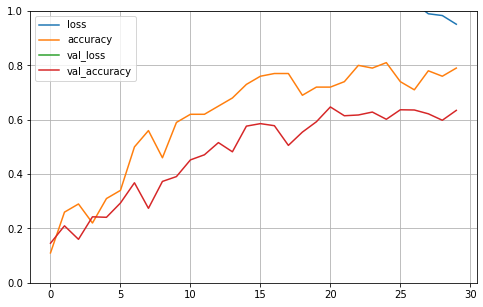

In [190]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()

--------------------------
## Training the model after propogating the labels to 70% nearest data points in each cluster: 
High expectations due 2 reasons:
* Firstly, we are using a neural network and more training data improves the chances of getting a better accuracy
* Secondly, the meaningful propogation of labels to only 50% nearest data points in each case leads to avoiding any outlier(wrongly classified image during clustering) to be used for training the network.

In [201]:
y_train_propagated = np.empty(len(x_train_2d), dtype=np.int32)
for i in range(100):
    y_train_propagated[kmeans.labels_==i] = y_train[centres_indexes][i]
y_train_propagated

array([6, 0, 7, ..., 4, 0, 5])

In [212]:
#Code for partial propogation

percentile_closest = 70

X_cluster_dist = y_pred[np.arange(len(x_train_2d)), kmeans.labels_]  #distances between data points and their clusters
for i in range(100):
    in_cluster = (kmeans.labels_ == i)               #Picking the data points indices belonging only to the ith cluster
    cluster_dist = X_cluster_dist[in_cluster]        #considering the cluster distances of the only ith cluster data points
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) #finding the cut-off distance which demarcates the 70% boundary in the ith cluster data points
    above_cutoff = (X_cluster_dist > cutoff_distance) #filtering out only the top 70% closest data points to the ith cluster mean from amongst the ith cluster
    X_cluster_dist[in_cluster & above_cutoff] = -1  #designating the labels of remaining 30 percent with -1 to not use them

In [213]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = x_train_2d[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated] #using the fully propogated labels to pick only the 70% labels

In [214]:
X_train_partially_propagated.shape

(38485, 784)

In [215]:
keras.backend.clear_session()
model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [216]:
history = model.fit(X_train_partially_propagated, y_train_partially_propagated, epochs=30,
                    validation_data=(x_val_2d, y_valid))

Epoch 1/30
1203/1203 [==============================] - 3s 3ms/step - loss: 0.9659 - accuracy: 0.7137 - val_loss: 0.7539 - val_accuracy: 0.7146
Epoch 2/30
1203/1203 [==============================] - 3s 2ms/step - loss: 0.3962 - accuracy: 0.8521 - val_loss: 0.8043 - val_accuracy: 0.7308
Epoch 3/30
1203/1203 [==============================] - 2s 2ms/step - loss: 0.3328 - accuracy: 0.8723 - val_loss: 0.8019 - val_accuracy: 0.7354
Epoch 4/30
1203/1203 [==============================] - 3s 2ms/step - loss: 0.3019 - accuracy: 0.8847 - val_loss: 0.8556 - val_accuracy: 0.7314
Epoch 5/30
1203/1203 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.8962 - val_loss: 0.9218 - val_accuracy: 0.7206
Epoch 6/30
1203/1203 [==============================] - 4s 3ms/step - loss: 0.2603 - accuracy: 0.8961 - val_loss: 1.0301 - val_accuracy: 0.7162
Epoch 7/30
1203/1203 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9049 - val_loss: 1.0132 - val_accuracy:

#### Here, the validation set accuracy reaches a maximum of around 73.5 % in 30 epochs as expected but the plot below suggests that it saturates around this value and training accuracy still improves suggesting overfitting
* Note: We should have tried with a higher cluster count to get better representatives but clustering at higher values of K would need more time to perform clustering. 
* However, the improvement in accuracy due to better representatives and label propogation is observable at k = 100 too.

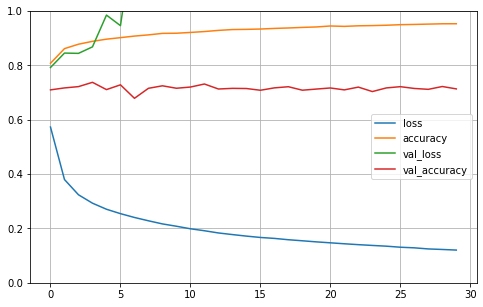

In [211]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
# save_fig("keras_learning_curves_plot")
plt.show()